# Классификация при помощи ДПР

# Описание набора данных

В этой лабораторной работе мы рассмотрим разные подходы к задаче классификации, в частности, деревья принятия решений, а также поговорим о том, как бороться с несбалансированностью датасета.

Изучаемый нами набор данных — это набор данных о принятых предложениях по кредитам в банке **Thera-Bank**. Основные клиенты банка пользуются банком для того, чтобы разместить в нем свои денежные средства, то есть являются вкладчиками. В то же время, большую прибыль банку приносят кредиторы — люди, берущие в банке кредит. Поэтому банк хочет сформировать для своих вкладчиков выгодные предложения по кредиту. Кампания, проведенная банком для вкладчиков в прошлом году, показала, что коэффициент конверсии составил более 9,6%. Это побудило отдел маркетинга разработать кампании с улучшенным целевым маркетингом, чтобы увеличить вероятность успеха при, естественно, минимальном бюджете. Департамент хотел бы разработать классификатор, который поможет им определить потенциальных клиентов, которые с большей вероятностью приобретут кредит. Это повысит вероятность успеха при одновременном снижении стоимости кампании.

Набор данных содержит как информацию о клиенте, так и информацию о его реакции на кампанию предыдущего года:

*   **ID**: ID клиента

*   **Age**: Возраст (полных лет)

*   **Experience**: Стаж

*   **Income**: Годовой доход (в тысячах)

*   **ZIP Code**: Индекс места проживания

*   **Family**: Количество членов семьи

*   **CCAvg**: Средние траты в месяц по кредитной карте (в тысячах)

*   **Education**: Уровень образования (1: бакалавр, 2: магистр, 3: что-то большее)

*   **Mortgage**: Стоимость ипотеки, если имеется (в тысячах)

*   **Securities Account**: Наличие счета в ценных бумагах

*   **CD Account**: Наличие сертификата на депозит

*   **Online**: Использует ли клиент интернет-банкинг

*   **CreditCard**: Использует ли клиент кредитную карту, выпущенную данным банком

*   **Personal Loan**: Принял ли клиент персональное предложение по кредиту (целевая переменная)

# Разведочный анализ данных

Считайте набор данных в датафрейм

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from scipy import stats

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


# Новый раздел

При помощи метода <code>.describe()</code> изучите набор данных «с высоты птичьего полета».

In [ ]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,3917.000000,3917.00000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000
mean,45.435027,20.19760,71.739086,2.387797,1.887457,1.888180,47.549400,0.088844,0.103395,0.057953,0.598672,0.291294
std,11.479527,11.49307,45.031675,1.151667,1.704859,0.841806,83.039854,0.284554,0.304514,0.233683,0.490230,0.454417
min,23.000000,-3.00000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.00000,38.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.00000,62.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.00000,93.000000,3.000000,2.500000,3.000000,93.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.00000,224.000000,4.000000,10.000000,3.000000,359.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Набор данных содержит 14 переменных, 1 из которых является целевой.

1 номинальная переменная: **ID**

5 числовых переменных: **Age**, **Experience**, **Income**, **CCAvg**, **Mortgage**

3 категориальные переменных: **Family**, **Education**, **ZIP Code**

5 булевых переменных: **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**

Пропущенных значений нет.

Experience содержит какие-то отрицательные значения

Удалите колонку ID, она нам не понадобится

In [3]:
df.drop('ID', axis=1, inplace=True)


df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,56,32,51,92780,4,1.5,1,0,0,0,0,0,0


Имеет смысл попробовать отловить каике-либо зависимости или их отсутствие.

Постройте матрицу корреляций

In [ ]:
correlation_matrix = df.corr()
max_correlation = 0
variable1 = None
variable2 = None

for var1 in df.columns:
    for var2 in df.columns:
        if var1 != var2:
            correlation = correlation_matrix.loc[var1, var2]
            if abs(correlation) > abs(max_correlation):
                max_correlation = correlation
                variable1 = var1
                variable2 = var2

print(f"Наибольшая корреляция: {max_correlation} между переменными {variable1} и {variable2}")

Наибольшая корреляция: 0.9941340415824269 между переменными Age и Experience


Определите две наиболее коррелированных переменных

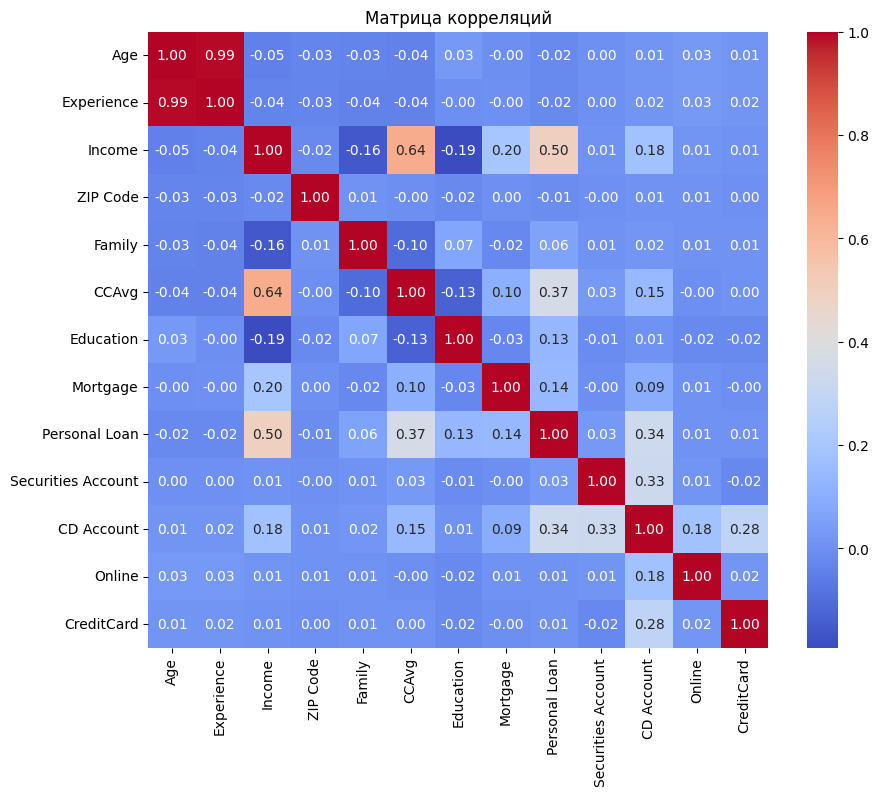

In [ ]:

corr_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляций")
plt.show()

Определите признак, который меньше всего коррелирует (можно считать почти не коррелирует) с остальными признаками (в том числе с откликом). Удалите этот признак из рассмотрения.

Введите название удаленного признака.

In [4]:
mean_corr = df.corr().abs().mean()

least_correlated_feature = mean_corr.idxmin()

df.drop(least_correlated_feature, axis=1, inplace=True)

print("Удаленный признак:", least_correlated_feature)

Удаленный признак: ZIP Code


# Предварительная подготовка данных

## Модификация признаков

Стоит разобраться с полем <code>Experience</code>. Видно, что опыт коррелирует с возрастом. Однако, в поле <code>Experience</code> присутствуют отрицательные значения. Имеет смысл "сдвинуть" значения в этой колонке. Добавьте ко всем значениям колонки <code>Experience</code> одно число так, чтобы минимальное значение было равно $0$.

Вычислите выборочное среднее колонки <code>Experience</code> после преобразования.

In [5]:
min_experience = df['Experience'].min()

shift_value = abs(min_experience)

df['Experience'] = df['Experience'] + shift_value

mean_experience = df['Experience'].mean()

print("Выборочное среднее Experience после преобразования:", mean_experience)

Выборочное среднее Experience после преобразования: 23.19625


Аналогично имеет смысл модфицировать поле <code>CCAvg</code>. Раз рассматривается годовой доход, то имеет смысл и значения трат рассматривать в рамках года.

Вычислите выборочное среднее колонки <code>CCAvg</code> после преобразования.

In [6]:
df['CCAvg'] = df['CCAvg'] * 12

mean_ccavg = df['CCAvg'].mean()

print("Выборочное среднее CCAvg после преобразования:", mean_ccavg)

Выборочное среднее CCAvg после преобразования: 23.06166


## Определение выбросов

Постройте ящики с усами для всех предикторов. Рекомендуем использовать <code>sns.boxplot()</code>. Определите признак по изображению boxplot из вашего варианта.

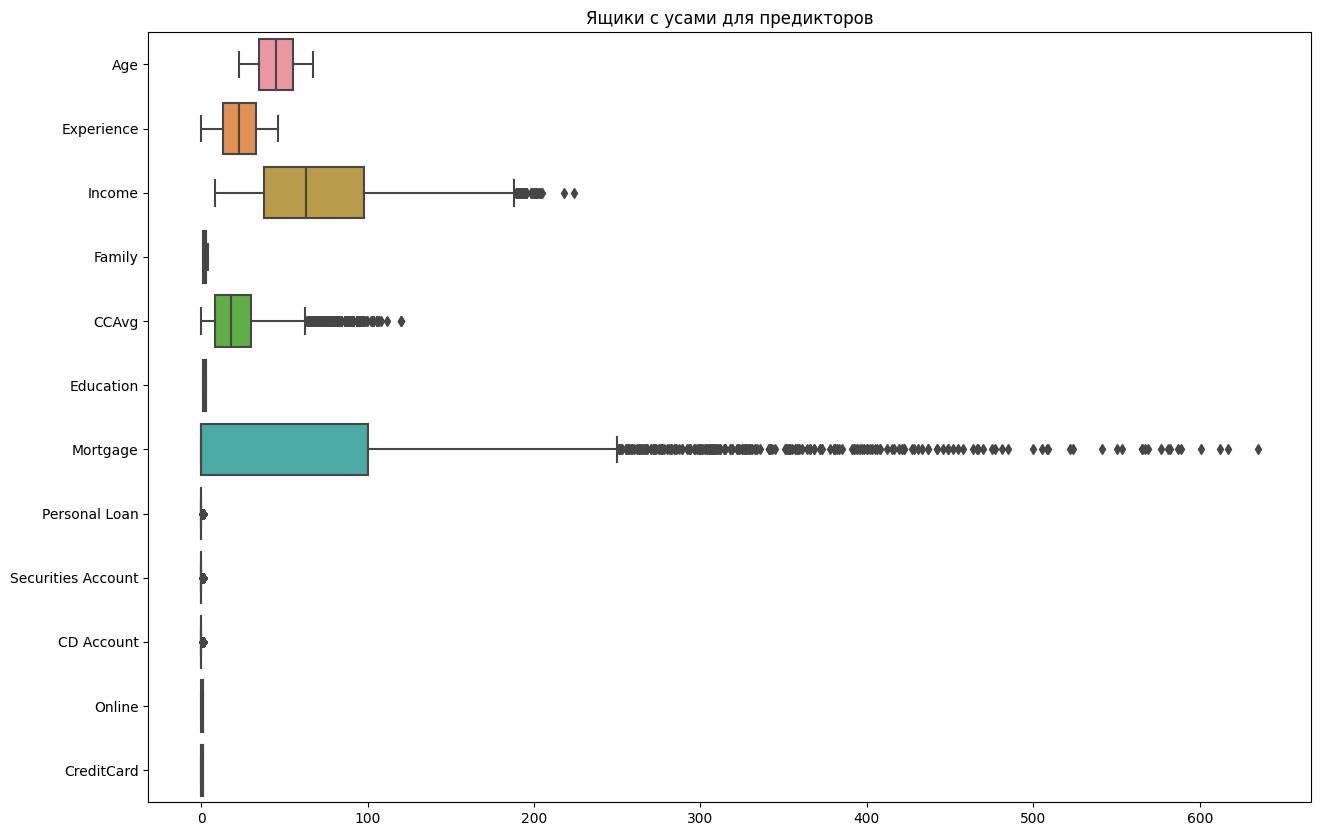

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title("Ящики с усами для предикторов")
plt.show()

Определите признак, содержащий наибольшее число выбросов. Введите название этого признака.


In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['Securities Account'])

print('number of outliers: '+ str(len(outliers)))

number of outliers: 416


In [ ]:
def find_outliers_IQR(df):
    outliers_count = {}

    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        outliers = df[(df[column] < (q1 - 1.5 * IQR)) | (df[column] > (q3 + 1.5 * IQR))]
        outliers_count[column] = len(outliers)

    return outliers_count

outliers_count = find_outliers_IQR(df)

for column, count in outliers_count.items():
    print(f'Number of outliers in "{column}": {count}')

Number of outliers in "Age": 0
Number of outliers in "Experience": 0
Number of outliers in "Income": 70
Number of outliers in "Family": 0
Number of outliers in "CCAvg": 255
Number of outliers in "Education": 0
Number of outliers in "Mortgage": 233
Number of outliers in "Personal Loan": 384
Number of outliers in "Securities Account": 416
Number of outliers in "CD Account": 246
Number of outliers in "Online": 0
Number of outliers in "CreditCard": 0


Имеет смысл поработать с этим признаком, а для этого стоит руководствоваться следующими статистическими соображениями. Если вычесть из данных выборочное среднее, а после поделить на среднеквадратическое отклонение, то, пользуясь правилом 3-$\sigma$ для нормального распределения, можно выбросить слишком далекие от нуля хвосты. Постройте гистограмму распределения значений в рамках этого признака.

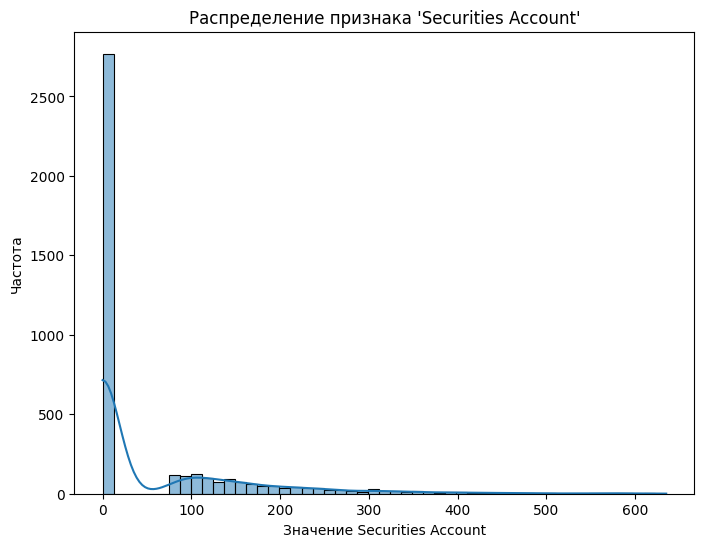

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Mortgage', kde=True)
plt.title("Распределение признака 'Mortgage'")
plt.xlabel("Значение Securities Account")
plt.ylabel("Частота")
plt.show()

Очевидно в рамках этого признака есть небольшое количество значений, которые лежат далеко. Можно использовать <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html"><code>z-score</code></a> функцию из библиотеки <code>scipy</code>.

Вспомнив курс теории вероятностей, становится понятно, что около $99.7\%$ нормального распределения сождержатся в отрезке $[-3\sigma, 3\sigma]$. Определите число элементов, модуль <code>z-score</code> которых больше, чем $3$.

In [ ]:
z_scores = stats.zscore(df['Mortgage'])

count_outliers = len([z for z in z_scores if abs(z) > 3])

print("Число элементов с модулем z-score больше 3:", count_outliers)

Число элементов с модулем z-score больше 3: 83


Итак, выбросов не очень множко, поэтому выбросите их из набора данных. Введите оставшееся в датасете число строк.

In [ ]:
df.shape

(4000, 12)

In [7]:
z_scores = stats.zscore(df['Mortgage'])

df = df[abs(z_scores) <= 3]
df.shape

(3917, 12)

# Построение моделей

# Базовый алгоритм

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
z_scores = stats.zscore(df['Mortgage'])
outlier_indices = [i for i, z in enumerate(z_scores) if abs(z) > 3]
df = df.drop(outlier_indices)

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

model = DecisionTreeClassifier(random_state=15, criterion='gini')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.8571428571428571


Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [9]:
model_entropy = DecisionTreeClassifier(random_state=15, criterion='entropy')
model_entropy.fit(X_train, y_train)

y_pred_entropy = model_entropy.predict(X_test)

f1_entropy = f1_score(y_test, y_pred_entropy)

print("F1 Score (criterion='entropy'):", f1_entropy)

F1 Score (criterion='entropy'): 0.921985815602837


## Учет дисбаланса соотношения классов

А теперь, если вспомнить, что выборка несбалансирована, то можно указать дополнительный параметр <code>class_weight</code>. Обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [10]:
model_entropy = DecisionTreeClassifier(random_state=15, criterion='gini', class_weight='balanced')
model_entropy.fit(X_train, y_train)

y_pred_entropy = model_entropy.predict(X_test)

f1_entropy = f1_score(y_test, y_pred_entropy)


print("F1 Score (criterion='entropy'):", f1_entropy)

F1 Score (criterion='entropy'): 0.8671328671328671


In [11]:
model_entropy = DecisionTreeClassifier(random_state=15, criterion='entropy', class_weight='balanced')
model_entropy.fit(X_train, y_train)


y_pred_entropy = model_entropy.predict(X_test)


f1_entropy = f1_score(y_test, y_pred_entropy)


print("F1 Score (criterion='entropy'):", f1_entropy)

F1 Score (criterion='entropy'): 0.8732394366197184


## Upsampling обучающей выборки

Помимо очевидного присвоения весов несбалансированным классам, можно воспользоваться алгоритмом <code>SMOTE</code>. Ему на вход подаются экземпляры всех классов с их метками, а он в свою очередь пытается на их основе экстраполировать само распределение данных этого класса. После этого он сэмплирует новые объекты классов так, пока количество строк каждого класса не станет везде одинаковым.

Получается, что в таком случае будет получена сбалансированная выборка, и пропадет нужда как-то ухищряться с весами и прочим.

Определите долю элементов класса $0$ тренировочного набора данных.

In [12]:

class_0_fraction = (y_train == 0).sum() / len(y_train)


print("Доля элементов класса 0 в тренировочном наборе данных:", class_0_fraction)

Доля элементов класса 0 в тренировочном наборе данных: 0.9112671560804341


Используя класс <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html"><code>SMOTE</code></a> из модуля <code>imblearn.over_sampling</code> сбалансируйте обучающую выборку с параметрами, указанными в вашем варианте.

In [13]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=15)


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


class_0_count_after_upsampling = (y_train_resampled == 0).sum()


print("Количество объектов класса 0 в обучающей выборке после upsampling'а:", class_0_count_after_upsampling)

Количество объектов класса 0 в обучающей выборке после upsampling'а: 2855


Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов. Введите количество объектов класса $1$.

In [14]:
(y_train_resampled == 1).sum()

2855

Снова обучите модель <code>DecisionTreeClassifier</code> с параметрами, указанными в вашем варианте на тренировочных данных, оцените на тестовых. Вычислите <code>f1_score</code> модели на тестовых данных.

In [15]:
model_entropy = DecisionTreeClassifier(random_state=15, criterion='gini')
model_entropy.fit(X_train_resampled, y_train_resampled)


y_pred_entropy = model_entropy.predict(X_test)


f1_entropy = f1_score(y_test, y_pred_entropy)


print("F1 Score (criterion='entropy'):", f1_entropy)

F1 Score (criterion='entropy'): 0.8235294117647058


In [16]:
model_entropy = DecisionTreeClassifier(random_state=15, criterion='entropy')
model_entropy.fit(X_train_resampled, y_train_resampled)


y_pred_entropy = model_entropy.predict(X_test)


f1_entropy = f1_score(y_test, y_pred_entropy)


print("F1 Score (criterion='entropy'):", f1_entropy)

F1 Score (criterion='entropy'): 0.8441558441558441


---

# 3 Задание

In [ ]:
df_test = pd.read_csv('Bank_Personal_Loan_Modelling_reserved.csv')
df_test.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,64,39,23,3,0.5,1,0,1,0,0,0
1,33,9,184,2,4.8,2,0,0,0,0,0
2,58,33,22,3,0.2,1,0,0,0,1,0
3,54,24,61,4,2.0,3,0,1,0,1,0
4,55,29,49,2,0.8,3,220,0,0,0,1


In [ ]:
df_train = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')
df_train.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
z_scores = stats.zscore(df_train['Mortgage'])
outlier_indices = [i for i, z in enumerate(z_scores) if abs(z) > 3]
df_train = df_train.drop(outlier_indices)

In [ ]:
X_train = df_train.drop('Personal Loan', axis=1)
y_train = df_train['Personal Loan']

In [ ]:
model_entropy = DecisionTreeClassifier(random_state=15, criterion='entropy')
model_entropy.fit(X_train, y_train)

y_pred_entropy = model_entropy.predict(df_test)

predictions_list = y_pred_entropy.tolist()
print(predictions_list)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
len(predictions_list)

1000

In [ ]:
df_test.shape

(1000, 11)